<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Before-your-start:" data-toc-modified-id="Before-your-start:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Before your start:</a></span></li><li><span><a href="#Challenge-1---Import-and-Describe-the-Dataset" data-toc-modified-id="Challenge-1---Import-and-Describe-the-Dataset-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Challenge 1 - Import and Describe the Dataset</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?" data-toc-modified-id="Explore-the-dataset-with-mathematical-and-visualization-techniques.-What-do-you-find?-2.0.0.1"><span class="toc-item-num">2.0.0.1&nbsp;&nbsp;</span>Explore the dataset with mathematical and visualization techniques. What do you find?</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-2---Data-Cleaning-and-Transformation" data-toc-modified-id="Challenge-2---Data-Cleaning-and-Transformation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Challenge 2 - Data Cleaning and Transformation</a></span></li><li><span><a href="#Challenge-3---Data-Preprocessing" data-toc-modified-id="Challenge-3---Data-Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Challenge 3 - Data Preprocessing</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here." data-toc-modified-id="We-will-use-the-StandardScaler-from-sklearn.preprocessing-and-scale-our-data.-Read-more-about-StandardScaler-here.-4.0.0.1"><span class="toc-item-num">4.0.0.1&nbsp;&nbsp;</span>We will use the <code>StandardScaler</code> from <code>sklearn.preprocessing</code> and scale our data. Read more about <code>StandardScaler</code> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler" target="_blank">here</a>.</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Challenge-4---Data-Clustering-with-K-Means" data-toc-modified-id="Challenge-4---Data-Clustering-with-K-Means-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Challenge 4 - Data Clustering with K-Means</a></span></li><li><span><a href="#Challenge-5---Data-Clustering-with-DBSCAN" data-toc-modified-id="Challenge-5---Data-Clustering-with-DBSCAN-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Challenge 5 - Data Clustering with DBSCAN</a></span></li><li><span><a href="#Challenge-6---Compare-K-Means-with-DBSCAN" data-toc-modified-id="Challenge-6---Compare-K-Means-with-DBSCAN-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Challenge 6 - Compare K-Means with DBSCAN</a></span></li><li><span><a href="#Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters" data-toc-modified-id="Bonus-Challenge-2---Changing-K-Means-Number-of-Clusters-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Bonus Challenge 2 - Changing K-Means Number of Clusters</a></span></li><li><span><a href="#Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples" data-toc-modified-id="Bonus-Challenge-3---Changing-DBSCAN-eps-and-min_samples-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Bonus Challenge 3 - Changing DBSCAN <code>eps</code> and <code>min_samples</code></a></span></li></ul></div>

# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings                                              
from sklearn.exceptions import DataConversionWarning          
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [9]:
# loading the data: Wholesale customers data

customers = pd.read_csv('C:/Users/KK/Documents/$$$IRONHACK/2-Week-AI-ML-Supervised-Unsupervised/Day 9/lab-unsupervised-learning-en/data/Wholesale customers data.csv')


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [17]:
# Your code here:

# quick preview
print(customers.head())

print("\nDatatypes:")
print(customers.dtypes)

#there are no catagorical data to convert. #The columns are type of purchases by the customer and thru which channel (instore, online etc.,) 
print("\nColumns:")
print(customers.columns)

#there are no missing data
print("\nMissing data:")
print(customers.isnull().sum())
      

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185

Datatypes:
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

Columns:
Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

Missing data:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Deter

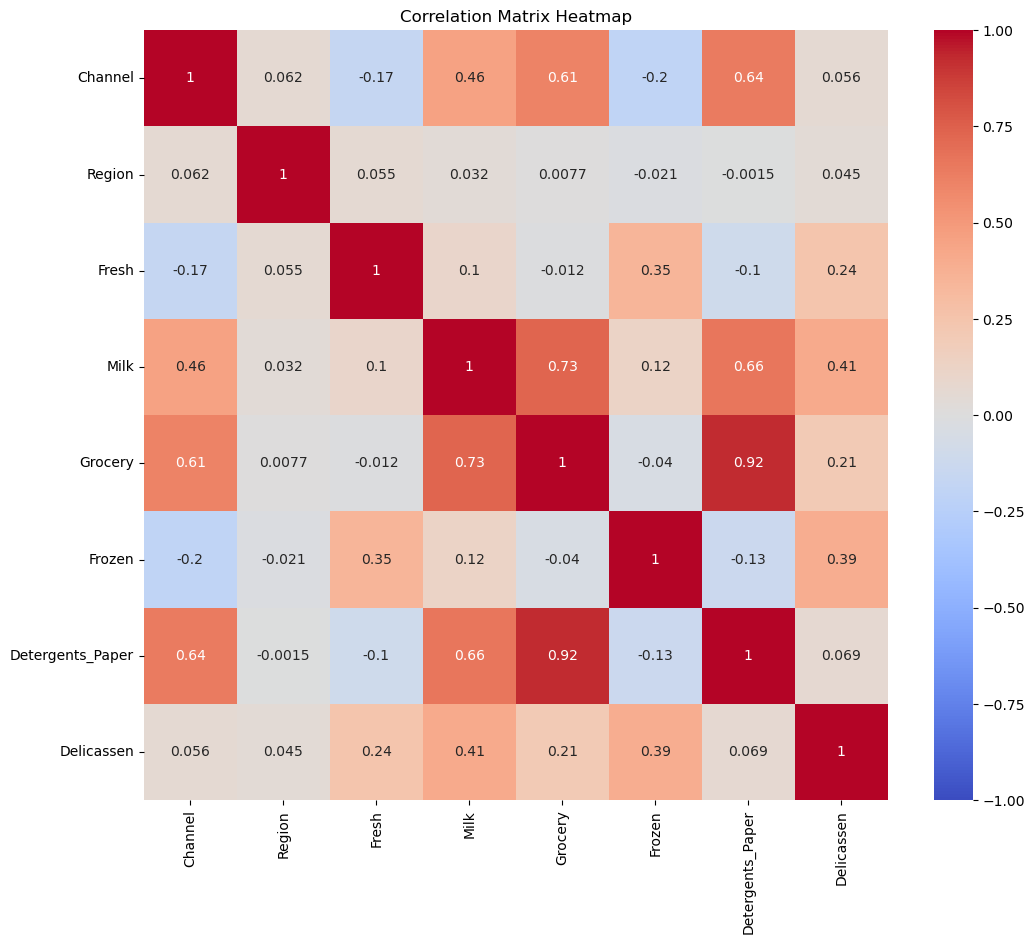

In [20]:
# Create the correlation matrix

numeric_columns = customers.select_dtypes(include=['number'])  # Select only numeric columns
correlation_matrix = numeric_columns.corr()
#print(correlation_matrix)

#Create the Heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

#Comment on which columns have high colliearity

#Columns with correlation coefficients close to 1 or -1 in the heatmap. ie) 'Grocery' and 'Detergents_Paper'. I will be dropping one of these columns.  

#It may be a good idea to remove some of the above columns to improve redundancy.

In [21]:
# I am not doing feature importance as the Class (ie) label) is unknown and we are just clustering them.

#removing one column from customers df post the collinearity analysis above. I will remove Detergents_Paper

customers_col = customers.drop(columns=['Detergents_Paper'])
customers_col

,Channel,Region,Fresh,Milk,Grocery,Frozen,Delicassen
0,2,3,12669,9656,7561,214,1338
1,2,3,7057,9810,9568,1762,1776
2,2,3,6353,8808,7684,2405,7844
3,1,3,13265,1196,4221,6404,1788
4,2,3,22615,5410,7198,3915,5185
...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,2204
436,1,3,39228,1431,764,4510,2346
437,2,3,14531,15488,30243,437,1867
438,1,3,10290,1981,2232,1038,2125


**Your observations here**

- ex.: Frozen, Grocery, Milk and Detergents Paper have a high...
- ...



# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
# Your code here

# Data need not be cleaned becauses
    # 1. There is no missing values
    # 2. There is no catagorical data to be managed.

**Your comment here**

-  ...
-  ...

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [28]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:

#Scaling the data to reduce the range of feature values

scaled_customers = StandardScaler().fit_transform(customers_col)
scaled_customers

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.04111489,
        -0.58936716, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ...,  0.17031835,
        -0.27013618,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.0281571 ,
        -0.13753572,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ...,  2.34838631,
        -0.54337975,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.60251388,
        -0.41944059,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.57322717,
        -0.62009417, -0.52286938]])

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Your code here:

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)  
kmeans.fit(scaled_customers)

# Create a new column 'labels' in the original 'customers' DataFrame
customers['labels'] = kmeans.labels_

print(customers.head())



c:\Users\KK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  labels  
0        1338       0  
1        1776       0  
2        7844       0  
3        1788       1  
4        5185       0  


### Looking to the elbow we can choose 2 like the correct number of clusters

c:\Users\KK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\KK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\KK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\KK\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

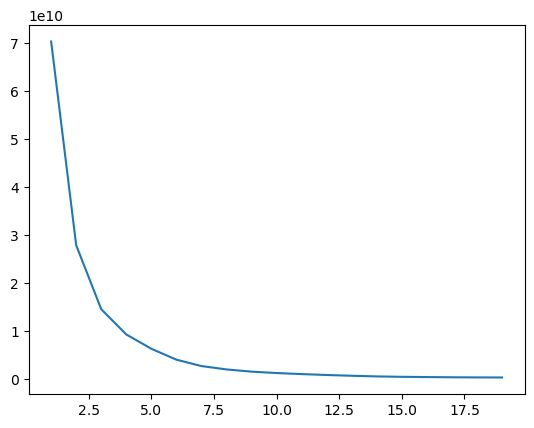

In [42]:

dataset=customers.iloc[:,[1,2]].values
dataset

from sklearn.cluster import KMeans
WCSS=[]
for i in range(1,20):
  kmeans=KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(dataset)
  WCSS.append(kmeans.inertia_)
WCSS

plt.plot(range(1,20),WCSS)


In [37]:
#clean_customers['Label'] = clusters
# in the above Elbow diagram it shows 2 as the place where the inertia stops dropping and goes Flat, so we are taking 2 Clusters.

Count the values in `labels`.

In [33]:
# Your code here:
customers["labels"].value_counts()

labels
1    296
0    144
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [39]:
from sklearn.cluster import DBSCAN 

# Your code here

# Applying DBSCAN
dbscan = DBSCAN(eps=0.5)

# Fit the model to the scaled data
dbscan.fit(scaled_customers)

# Assign the labels back to the original DataFrame
customers['labels_DBSCAN'] = dbscan.labels_


Count the values in `labels_DBSCAN`.

In [40]:
# Your code here
print(customers['labels_DBSCAN'].value_counts())
print(customers['labels'].value_counts())

labels_DBSCAN
-1    222
 2    138
 0     31
 4     23
 1      7
 5      7
 6      7
 3      5
Name: count, dtype: int64
labels
1    296
0    144
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [55]:
def plot(x,y,hue):
    sns.scatterplot(x=x, 
                    y=y,
                    data=customers,
                    hue=hue)
    #plt.title('Detergents Paper vs Milk ')
    return plt.show();

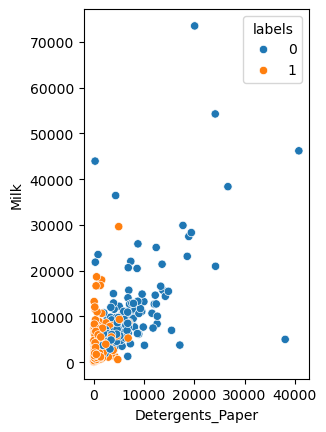

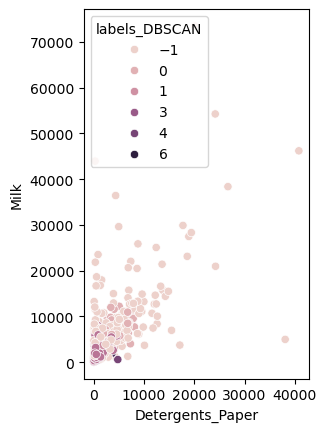

In [56]:
# Your code here:


# Plot for K-Means labels
plt.subplot(1, 2, 1)
plot('Detergents_Paper', 'Milk', 'labels')
#plt.title('K-Means Clustering')



# Plot for DBSCAN labels
plt.subplot(1, 2, 2)
plot('Detergents_Paper', 'Milk', 'labels_DBSCAN')
#plt.title('DBSCAN Clustering')


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

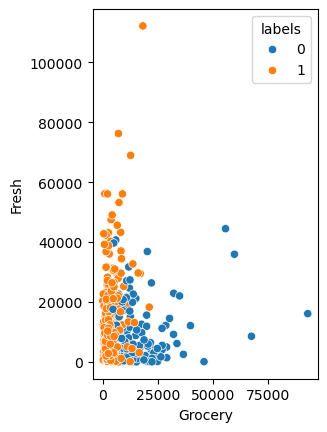

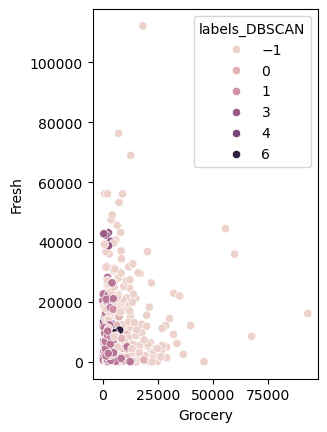

In [57]:
# Your code here:


# Plot for K-Means labels
plt.subplot(1, 2, 1)
plot('Grocery', 'Fresh', 'labels')
#plt.title('K-Means Clustering')



# Plot for DBSCAN labels
plt.subplot(1, 2, 2)
plot('Grocery', 'Fresh', 'labels_DBSCAN')
#plt.title('DBSCAN Clustering')


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

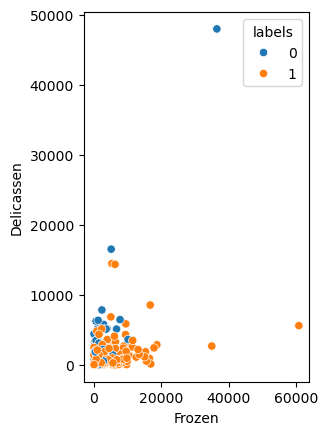

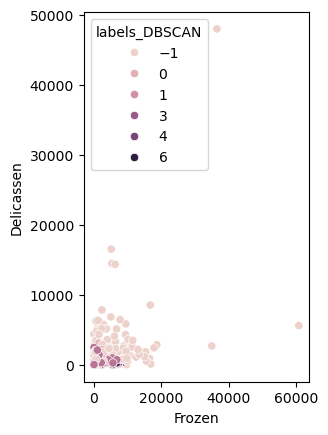

In [58]:
# Your code here:

# Plot for K-Means labels
plt.subplot(1, 2, 1)
plot('Frozen', 'Delicassen', 'labels')
#plt.title('K-Means Clustering')



# Plot for DBSCAN labels
plt.subplot(1, 2, 2)
plot('Frozen', 'Delicassen', 'labels_DBSCAN')
#plt.title('DBSCAN Clustering')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [62]:
# Your code here:

# Group by K-Means labels and compute the mean for all columns
mean_by_labels = customers.groupby('labels').mean()
print("Mean by K-Means Labels:\n", mean_by_labels)

# Group by DBSCAN labels and compute the mean for all columns
mean_by_labels_dbscan = customers.groupby('labels_DBSCAN').mean()
print("Mean by DBSCAN Labels:\n", mean_by_labels_dbscan)


Mean by K-Means Labels:
          Channel    Region         Fresh          Milk       Grocery  \
labels                                                                 
0       1.979167  2.611111   9034.930556  11181.597222  16419.243056   
1       1.003378  2.510135  13442.908784   3176.375000   3831.726351   

             Frozen  Detergents_Paper   Delicassen  labels_DBSCAN  
labels                                                             
0       1898.861111       7175.618056  2098.618056      -0.687500  
1       3642.614865        792.459459  1245.750000       1.162162  
Mean by DBSCAN Labels:
                 Channel    Region         Fresh         Milk       Grocery  \
labels_DBSCAN                                                                
-1             1.468468  2.396396  14848.144144  8729.409910  11932.941441   
 0             2.000000  3.000000   4580.290323  7785.032258  10442.096774   
 1             2.000000  3.000000  12530.857143  3213.000000   6117.857143   


Which algorithm appears to perform better?

**Your observations here**

- 

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [41]:
# Your code here:

**Your comment here**

- 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

**Your comment here**

- 